# Linear Regression:
Regression predicts continuous values, whereas classification predicts a discrete class value (e.g. 0 or 1).
Consider the plot below. We wish to approximat the data with a linear function, so that we can define the **approximation** as:

$\hat{y} = wx + b + \epsilon$

We find $w,b$ with a cost function, in our case we will use the **Mean Squared Difference**:


$MSE = J(w,b) = \frac{1}{n} \sum_{i=1}^{n} (y_i - (wx_i+b))^2$

also known as the **error** function. We seek to minimize the error, and to do so, we perform **Gradient Descent**, which makes use of the fact that a (local) minimum of a function has its derivative equal to zero. Recall that the derivative will be:

$\nabla J(w,b) =  \begin{pmatrix} \frac{\partial J}{\partial w} \\ \frac{\partial J}{\partial b} \end{pmatrix} = \begin{bmatrix} \frac{1}{n} \sum_{i=1}^{n} -2x_i \cdot(y_i - (wx_i+b) \\ \frac{1}{n} \sum_{i=1}^{n} -2 \cdot(y_i - (wx_i + b)) \end{bmatrix}$

This is an iterative algorithm, i.e. numeric as opposed to an analytic one.

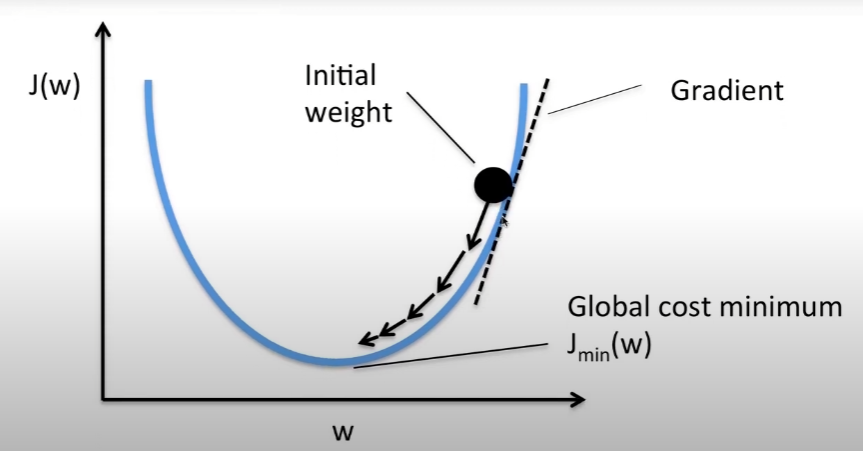

# Gradient Descent Optimization:

We find the optimal model parameter using Gradient Descent Optimization:

$ W_i = W_{i-1} - \alpha \cdot \frac{\partial J}{\partial W}$
where $W_i$ is the parameters matrix, $\alpha$ is the learning rate. Thus, the update rules for our case will be:

$ w = w - \alpha \cdot dw$

$ b = b - \alpha \cdot db$

where:

$\nabla J(w,b) =  \begin{pmatrix} \frac{\partial J}{\partial w} \\ \frac{\partial J}{\partial b} \end{pmatrix} = \begin{bmatrix} \frac{1}{n} \sum_{i=1}^{n} -2x_i \cdot(y_i - (wx_i+b) \\ \frac{1}{n} \sum_{i=1}^{n} -2 \cdot(y_i - (wx_i + b)) \end{bmatrix}$


* $ dw = \frac{\partial J}{\partial w} = \frac{1}{n} \sum_{i=1}^{n} -2x_i \cdot(y_i - (wx_i+b)) = \frac{1}{n} \sum_{i=1}^{n} -2x_i \cdot(y_i - y_{pred}) = \\ = \frac{1}{n} \sum_{i=1}^{n} 2x_i \cdot(y_{pred} - y_i)  $

\\
* $ db = \frac{\partial J}{\partial b} =  \frac{1}{n} \sum_{i=1}^{n} -2 \cdot(y_i - (wx_i + b)) = \frac{1}{n} \sum_{i=1}^{n} -2 \cdot(y_i - y_{pred}) = \\ = \frac{1}{n} \sum_{i=1}^{n} 2\cdot(y_{pred} - y_i) $

In [ ]:
from sklearn.datasets import make_regression

In [ ]:
X,y = make_regression(n_samples = 100, n_features=1, noise = 5, bias = 2.28)

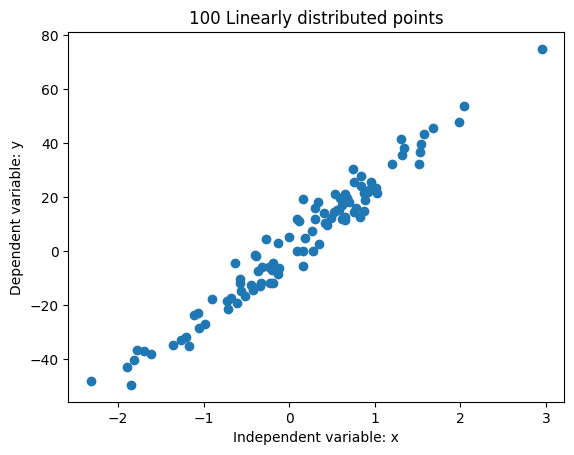

In [ ]:
import matplotlib.pyplot as plt

plt.figure()
plt.scatter(X,y)
plt.title('100 Linearly distributed points')
plt.xlabel('Independent variable: x')
plt.ylabel('Dependent variable: y')
plt.show()

In [19]:
import numpy as np

In [33]:
class LinearRegression:

  def __init__(self, lr: float = 0.001, n_iters: int = 1000):
    self.lr = lr
    self.n_iters = n_iters
    self.weights = None
    self.bias = None

  # following the convention of ML libraries like sklearn:
  def fit(self, X,y):
    # implement gradient descent:
    # 1st initialize parameters:
    n_samples, n_features = X.shape
    self.weights = np.zeros(n_features) # for each component, we put 0
    self.bias = 0

    # iterative Gradient Descent:
    for _ in range(self.n_iters):
      y_pred = np.dot(X, self.weights) + self.bias
      dw = (2/n_samples) * np.dot(X.T, (y_pred - y)) # X transposed now
      db = (2/n_samples) * np.sum(y_pred - y)

      self.weights -= self.lr * dw
      self.bias -= self.lr * db


  def predict(self, X):
    y_pred = np.dot(X, self.weights) + self.bias
    return y_pred

# Overview of the Data:
We originally generate a linearly distributed set of 100 points of only 1 feature, we add some noise and a bias. We split the data into 80-20 training-testing sets.

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 1234)

print(f'X_train shape and type: {X_train.shape, X_train.dtype}')
print(f'y_train shape and type: {y_train.shape, y_train.dtype}')
print(f'1st sample in X_train: {X_train[0]}')
print(f'1st value in y_train: {y_train[0]}')

X_train shape and type: ((80, 1), dtype('float64'))
y_train shape and type: ((80,), dtype('float64'))
1st sample in X_train: [0.87990865]
1st value in y_train: 21.534331695867266


In [ ]:
print(X[:5])
print(y[:5])

[[ 0.40244138]
 [-0.45138531]
 [-1.10887191]
 [ 0.41347054]
 [ 0.18346892]]
[ 14.33536151 -12.33890603 -23.62888697  10.35126455   4.97450836]


# Testing the Model:

In [34]:
model = LinearRegression()

In [35]:
def mse(y_actual, y_pred):
  return np.mean((y_actual - y_pred)**2)

In [36]:
model.fit(X_train, y_train)
prediction = model.predict(X_test)

In [37]:
error = mse(y_test, prediction)

In [38]:
print(error)

35.6562115214639


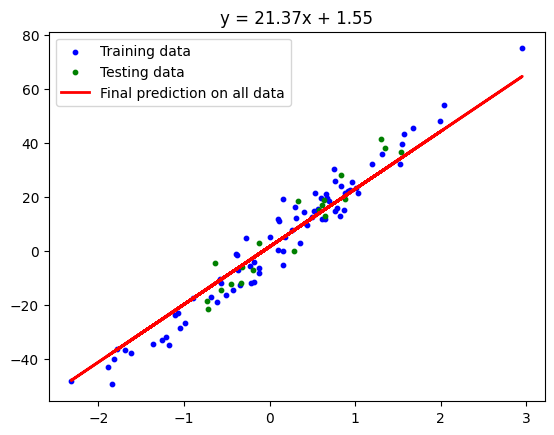

In [49]:
plt.figure()
plt.scatter(X_train, y_train, color = 'blue', s = 10)
plt.scatter(X_test, y_test, color = 'green', s = 10)
plt.plot(X, model.predict(X), color = 'red', linewidth = 2, label = 'Prediction')
plt.legend({'Training data', 'Testing data', 'Final prediction on all data'})
plt.title(f'y = {model.weights.item():.2f}x + {model.bias:.2f}')
plt.show()